Project: NLP for Requirements Engineering Interview Transcripts

Sixth SQL Query: Data Gouvernance Tags and Titles
 **Project: NLP for Requirements Engineering Interview Transcripts**
 
 Second SQL Query: Requirements Tags and Titles including scores

Query

SELECT TOP 500 q.Id AS QuestionId, q.Title AS QuestionTitle, q.Body AS QuestionBody, q.Tags AS QuestionTags, q.CreationDate AS Date, q.ViewCount AS ViewCount, q.Score AS Score, q.AnswerCount AS NumberOfAnswers, a.Id AS AnswerId, a.Body AS AnswerBody FROM Posts q INNER JOIN Posts a ON a.ParentId = q.Id WHERE q.PostTypeId = 1 AND ( q.Tags LIKE '%%' OR q.Tags LIKE'%%' OR q.Tags LIKE'%%' OR q.Tags LIKE'%%' OR q.Tags LIKE'%%' OR q.Tags LIKE'%%' OR q.Tags LIKE'%%' OR q.Title LIKE'%data synchronization%' OR q.Title LIKE'%data governance%' OR q.Title LIKE'%data quality%' OR q.Title LIKE'%single source of truth%' OR q.Title LIKE'%data standards%' OR q.Title LIKE'%data cleansing%' OR q.Title LIKE'%data architecture%' ) AND q.CreationDate >= '2018-01-01' ORDER BY q.CreationDate DESC;


**Combine data sets into a single one with 1000 rows**

In [1]:
import pandas as pd

# Load the datasets into pandas DataFrames
df = pd.read_csv('6query_data_governance.csv')
# Join the DataFrames
#data1 = pd.concat([data1, data2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
#data1.to_csv('df.csv', index=False)

In [2]:
len(df)

262

**Initial Exploration**

In [3]:
# Check for duplicates based on the 'QuestionId' and 'AnswerId' columns
df_no_duplicates = df.drop_duplicates(subset=['QuestionId', 'AnswerId'])

In [4]:
len(df_no_duplicates)

262

In [5]:
df.head(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody
0,75961897,How to sync in realtime a legacy system with a...,<p>I have a legacy grails based system with a ...,<mongodb><spring-boot><data-synchronization>,2023-04-07 20:58:30,19,0,1,75994127,<p>I have resolved my problem with AOP instead...
1,75916054,Insufficient CPU quota when running data quali...,<p>I try to follow the below guide from GCP to...,<google-cloud-platform><google-cloud-dataproc>...,2023-04-03 04:33:41,76,1,2,75919323,"<p>It won't help you, but even if you have act..."
2,75916054,Insufficient CPU quota when running data quali...,<p>I try to follow the below guide from GCP to...,<google-cloud-platform><google-cloud-dataproc>...,2023-04-03 04:33:41,76,1,2,75920854,"<p>As mentioned by @guillaume, there is set a ..."


In [6]:
df.tail(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody
259,48463910,CouchDB - Does synchronization copy a database...,<p>I was looking for various information on <s...,<database><couchdb><indexeddb><pouchdb><data-s...,2018-01-26 14:57:03,901,4,1,48466158,<p>PouchDB can be used in a many different con...
260,48379097,Is there a way to implement a lock-free soluti...,<p>I am running multiple instances of a java a...,<java><mysql><locking><data-synchronization>,2018-01-22 10:12:04,72,0,1,48379432,<p>Assuming that you're maintaining the ACIDit...
261,48064589,Firebase function in firebase function,<p>The following function has to return all of...,<swift><firebase><asynchronous><firebase-realt...,2018-01-02 16:35:17,115,0,1,48065939,<pre><code>///retrieves all of user's friends\...


In [7]:
# Identify missing values:
df.isnull().sum()

# Entferne NaN_Werte falls zutreffend: df.dropna(inplace=True)

QuestionId         0
QuestionTitle      0
QuestionBody       0
QuestionTags       0
Date               0
ViewCount          0
Score              0
NumberOfAnswers    0
AnswerId           0
AnswerBody         0
dtype: int64

In [8]:
# Convert the 'Date' column to a datetime object to allow for better manipulation:
df['Date'] = pd.to_datetime(df['Date'])

**Explore the data**

In [9]:
unique_question_tags = df['QuestionTags'].nunique()

print(f"There are {unique_question_tags} unique question tags in the dataset.")

There are 196 unique question tags in the dataset.


In [10]:
# Show unique question tags
df['QuestionTags'].unique()

array(['<mongodb><spring-boot><data-synchronization>',
       '<google-cloud-platform><google-cloud-dataproc><google-dataplex>',
       '<azure-databricks><spark-structured-streaming><great-expectations><data-quality><databricks-autoloader>',
       '<r><filter><tidyverse><data-quality>',
       '<google-sheets><google-sheets-formula><data-quality>',
       '<flutter><graph><cloud><local><data-synchronization>',
       '<r><shiny><dt><data-synchronization>',
       '<azure><azure-databricks><azure-purview><databricks-unity-catalog><data-governance>',
       '<databricks><delta-lake><great-expectations><data-quality>',
       '<python><tuples><where-clause>',
       '<python><c#><synchronization><data-synchronization>',
       '<python><data-quality><data-profiling>',
       '<databricks><azure-databricks><data-ingestion><delta-live-tables>',
       '<python><pandas><sorting><pivot><data-governance>', '<hbase>',
       '<python><pandas><pandas-profiling><data-quality><data-profiling>',


In [11]:
df['QuestionTags'].value_counts().head(50)

QuestionTags
<informatica><informatica-powercenter><data-quality>                                   4
<c++><multithreading>                                                                  4
<python><python-3.x>                                                                   4
<bash><shell>                                                                          4
<java><data-synchronization>                                                           3
<c><linux><data-synchronization>                                                       3
<python><regex><pandas><dataframe>                                                     3
<azure><azure-databricks><azure-purview><databricks-unity-catalog><data-governance>    3
<database><oracle><postgresql><data-synchronization>                                   3
<swift><multithreading><grand-central-dispatch><data-synchronization><barrier>         3
<sas><difference><data-quality>                                                        3
<node.js

In [12]:
df['QuestionTags'].describe()

count                                                   262
unique                                                  196
top       <informatica><informatica-powercenter><data-qu...
freq                                                      4
Name: QuestionTags, dtype: object

In [13]:
# Count the number of unique questions in the dataset
unique_questions_count = df['QuestionId'].nunique()

print(f"There are {unique_questions_count} unique questions in the dataset.")

There are 202 unique questions in the dataset.


In [14]:
unique_answers_count = df['AnswerId'].nunique()
print(f'There are {unique_answers_count} unique answers in the dataset.')

There are 262 unique answers in the dataset.


In [15]:
# Examine the basic statistics of the dataset:
df.describe()

,QuestionId,Date,ViewCount,Score,NumberOfAnswers,AnswerId
count,2.620000e+02,262,262.000000,262.000000,262.000000,2.620000e+02
mean,6.193179e+07,2020-06-14 14:34:30.492366592,639.232824,0.912214,1.587786,6.248667e+07
min,4.806459e+07,2018-01-02 16:35:17,17.000000,-3.000000,1.000000,4.806594e+07
25%,5.459078e+07,2019-02-08 16:45:05.249999872,97.500000,0.000000,1.000000,5.505132e+07
50%,6.101494e+07,2020-04-03 20:36:25.500000,268.500000,0.000000,1.000000,6.141008e+07
75%,7.012765e+07,2021-11-26 16:49:15,588.000000,1.000000,2.000000,7.029857e+07
max,7.596190e+07,2023-04-07 20:58:30,6857.000000,18.000000,4.000000,7.599413e+07
std,8.409103e+06,NaN,1106.970137,2.365931,0.838446,8.394139e+06


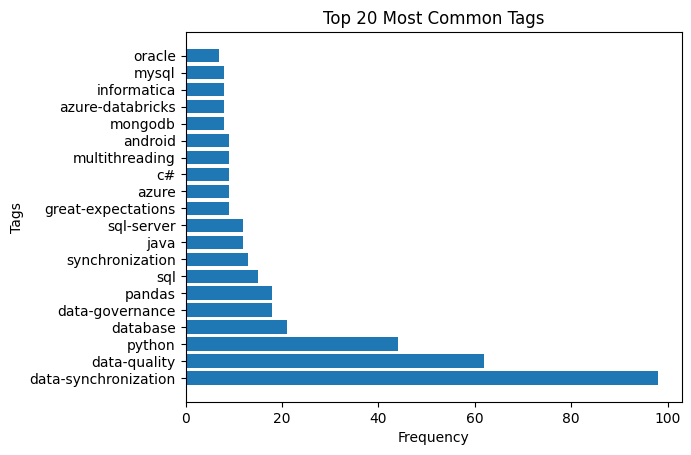

In [16]:
# Analyze the most common tags:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
tags = df['QuestionTags'].str.findall('<(.*?)>').explode().values
tag_counts = Counter(tags)
most_common_tags = tag_counts.most_common(20)

plt.barh([tag for tag, _ in most_common_tags], [count for _, count in most_common_tags])
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.title('Top 20 Most Common Tags')
plt.show()

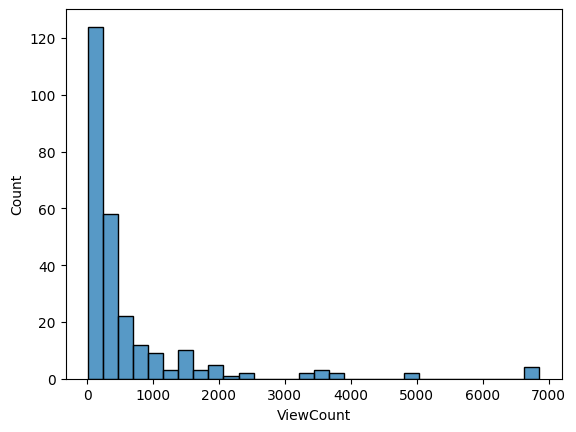

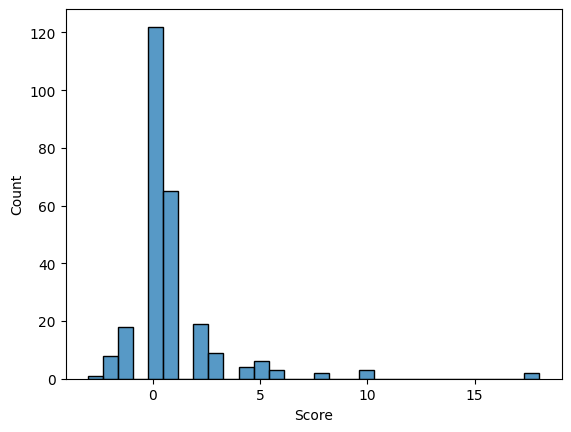

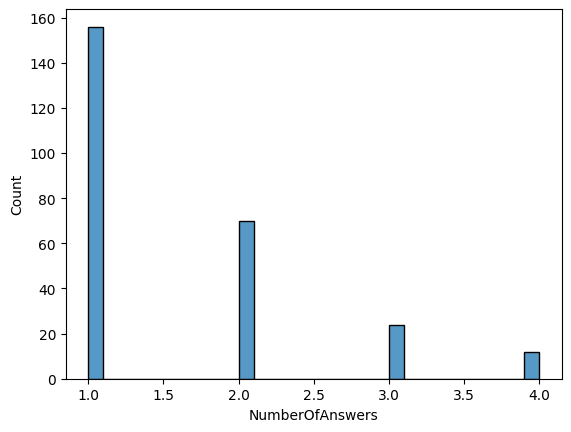

In [17]:
# Visualize the distribution of ViewCount, Score, and NumberOfAnswers:
#!pip install seaborn

sns.histplot(data=df, x='ViewCount', bins=30)
plt.show()

sns.histplot(data=df, x='Score', bins=30)
plt.show()

sns.histplot(data=df, x='NumberOfAnswers', bins=30)
plt.show()

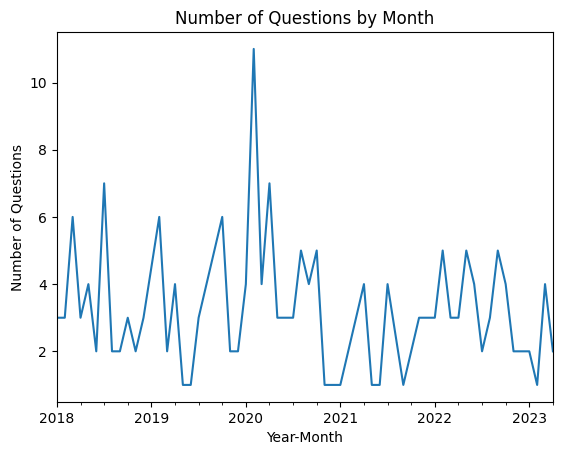

In [18]:
# Analyze the distribution of questions over time:

df['YearMonth'] = df['Date'].dt.to_period('M')

question_count_by_month = df.groupby('YearMonth')['QuestionId'].nunique()
question_count_by_month.plot()
plt.xlabel('Year-Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Month')
plt.show()

**NLP-Pre-Processing**

**_always:_** lowercasing, removal of non-alphanumeric characters

**_depends_** on task and corpus:* stopwords removal, lemmatization (for spaCy stopwords have to be removed)

Using BeautifulSoup to clean the question and answer body is helpful because it helps remove any HTML tags present in the text. The Stack Overflow dataset often contains text with HTML tags. 

These tags don't provide any valuable information for most NLP tasks and can be considered noise in the text data.

In [ ]:
from bs4 import BeautifulSoup

df['CleanedQuestionBody'] = df['QuestionBody'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df['CleanedAnswerBody'] = df['AnswerBody'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [ ]:
# Remove any unnecessary characters, such as punctuation, numbers, or extra whitespace, 
# and convert the text to lowercase:

import re

def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = re.sub(r'\d+', ' ', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespace
    text = text.replace('<code>', '').replace('</code>', '')  # Remove <code> tags
    return text

df['CleanedQuestionBody'] = df['CleanedQuestionBody'].apply(clean_text)
df['CleanedAnswerBody'] = df['CleanedAnswerBody'].apply(clean_text)

In [ ]:
# Extract tags from 'QuestionTags' column and store them in extra column:
df['Tags'] = df['QuestionTags'].str.findall('<(.*?)>')

In [ ]:
df.head(3)

In [ ]:
column_names = df.columns
print(column_names)

In [ ]:
# Tokenization (split text into individual words):
from nltk.tokenize import word_tokenize

df['TokenizedQuestionBody'] = df['CleanedQuestionBody'].apply(word_tokenize)
df['TokenizedAnswerBody'] = df['CleanedAnswerBody'].apply(word_tokenize)

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['LemmatizedQuestionBody'] = df['TokenizedQuestionBody'].apply(lemmatize_tokens)
df['LemmatizedAnswerBody'] = df['TokenizedAnswerBody'].apply(lemmatize_tokens)

In [ ]:
# Remove stopwords from the 'LemmatizedQuestionBody' column:

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['LemmatizedQuestionBody'] = df['LemmatizedQuestionBody'].apply(remove_stopwords)

In [ ]:
# Show if new columns were added
column_names = df.columns
print(column_names)

**Preprocess and analyze with spaCy**

In [ ]:
# remove <code> and </code> tags, which are commonly used 
# in Stack Overflow posts to denote code snippets. 
def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convert the list to a string by joining its elements
        #text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
        #text = re.sub(r'\d+', ' ', text)  # Remove digits
        #text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespace
        #text = text.replace('<code>', '').replace('</code>', '')  # Remove <code> tags
    return text

In [ ]:
#This code uses spaCy to analyze the text and extract entities, nouns, and verbs. Finally, it 
# displays the top 10 most common entities, nouns, and verbs found in the dataset.

# You can further customize this analysis by extracting more specific information 
# relevant to your domain or by using different NLP techniques, such as topic 
# modeling, sentiment analysis, or clustering.

import spacy
from collections import defaultdict

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Analyze the text and extract entities, nouns, and verbs
entities_counter = defaultdict(int)
nouns_counter = defaultdict(int)
verbs_counter = defaultdict(int)

for _, row in df.iterrows():
    question_body = preprocess_text(row['LemmatizedQuestionBody'])
    
    for text in [question_body]:
        doc = nlp(text)
        
        for ent in doc.ents:
            entities_counter[ent.text.lower()] += 1
        
        for token in doc:
            if token.pos_ == 'NOUN' and token.is_alpha:
                nouns_counter[token.text.lower()] += 1
            elif token.pos_ == 'VERB' and token.is_alpha:
                verbs_counter[token.text.lower()] += 1

# Display the top 10 most common entities, nouns, and verbs
def display_top_n(counter, n, title):
    print(title)
    for item, count in sorted(counter.items(), key=lambda x: x[1], reverse=True)[:n]:
        print(f"{item}: {count}")
    print()

display_top_n(entities_counter, 10, "Top 10 Entities")
display_top_n(nouns_counter, 10, "Top 10 Nouns")
display_top_n(verbs_counter, 10, "Top 10 Verbs")

**GPT4 Prompt** Discuss the results of the spaCy extractions from each extraction individually: (insert code and results from above)

**GPT4 Results:** The spaCy extraction results for the entities, nouns, and verbs are as follows:

    Top 10 Entities:
        two: 70
        one: 66
        first: 39
        second: 23
        max: 12
        three: 12
        dest_df: 8
        to_date: 7
        third: 7
        custom_sql: 6

The entities extracted are mainly related to ordinal and cardinal numbers, as well as specific technical terms such as "dest_df", "to_date", and "custom_sql".

    Top 10 Nouns:
        data: 545
        table: 223
        server: 221
        value: 218
        column: 165
        person: 150
        time: 142
        database: 136
        file: 130
        user: 124

The nouns extracted are primarily associated with data-related concepts, such as "data", "table", "server", "value", "column", "database", and "file". Other nouns like "person", "time", and "user" also indicate that the dataset deals with people and time aspects in data management.

    Top 10 Verbs:
        using: 145
        get: 128
        want: 85
        let: 64
        following: 63
        need: 56
        trying: 55
        know: 54
        make: 53
        wa: 51 (likely short for "was" or "were")

The verbs extracted show that the dataset contains questions related to various activities, such as using tools or methods, getting information or data, wanting or needing help, trying different approaches, and making changes. The presence of verbs like "know" and "following" suggests that users are seeking knowledge and understanding in their questions.

These extractions provide an insight into the common topics and activities discussed in the dataset. They can be used to further analyze the data, identify patterns, or even inform the development of domain-specific resources.

**Latent Dirichlet Allocation**

In [ ]:
import numpy as np
import random
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Set the random seed for numpy and python to ensure the same results each time the allocation re-runs
np.random.seed(42)
random.seed(42)

# Prepare the input data by using the lemmatized tokens from the 'LemmatizedQuestionBody' column:
documents = df['LemmatizedQuestionBody'].tolist()

# Create a dictionary and a bag of words corpus from the documents:
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(document) for document in documents]

# Set the seed for the random number generator used by the LDA model to a fixed value. 
# Ensures that the same sequence of random numbers is generated every time the model is trained 
# with the same input data and configuration.
random_state_seed = 42 
gensim.models.ldamodel.LdaModel.seed = random_state_seed

# Train the LDA model. You can choose the number of topics by setting the num_topics parameter:
num_topics = 5  # Change this value to the desired number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15) # Set the number of passes

# Display the top words for each topic
words_per_topic = 10  # Specify the number of top words per topic
for topic in range(num_topics):
    print(f"Topic {topic + 1}:")
    top_words = lda_model.show_topic(topic, topn=words_per_topic)
    for word, weight in top_words:
        print(f"  {word}: {weight:.4f}")
    print()

**Correction!!**

**GPT4 Prompt:** Summarize the results for the LDA on this data set. Give a title to each topic and discuss each topic individually: (insert code and results from above)

**GPT4 Results:** The LDA model was trained with 5 topics, and the top 10 keywords for each topic are displayed. Here is a summary of each topic with a suggested title based on the top keywords:

    Topic 1: "Data Manipulation and File Processing"
        This topic seems to be related to data manipulation, file processing, and working with data frames (df). It involves keywords like data, table, df, c, like, need, string, would, value, and file.

    Topic 2: "Cloud Data Solutions and Governance"
        This topic appears to focus on cloud data solutions and data governance. The keywords include data, file, col, azure, governance, value, sql, purview, work, and databricks.

    Topic 3: "Server and Client Data Management"
        This topic is likely about server and client-side data management. The keywords are value, server, data, id, n, client, user, time, b, and modified.

    Topic 4: "Personal Data and Privacy"
        This topic seems to be related to personal data and privacy concerns. The keywords include person, column, public, name, data, self, table, string, store, and var.

    Topic 5: "Database Systems and User Applications"
        This topic appears to focus on database systems and user applications, with keywords such as data, server, medium, lite, database, user, app, client, file, and want.

These topics provide an overview of the main themes discussed in the dataset. They can be useful for understanding the content, organizing information, and identifying areas of interest for further analysis.

In [ ]:
import numpy as np

# Get the document-topic matrix and pad with zeros if necessary 
# (lists inside doc_topic_matrix have different lengths.)
doc_topic_matrix = [np.pad([topic_prob for _, topic_prob in lda_model.get_document_topics(bow)], (0, lda_model.num_topics - len(lda_model.get_document_topics(bow))), mode='constant') for bow in corpus]

# Create a new column in the dataset to store the topic names
df['LDATopicName'] = ''

# Define a function that returns the topic name based on the index
def get_topic_name(topic_index):
    topic_names = {
        0: 'Data Manipulation and File Processing',
        1: 'Cloud Data Solutions and Governance',
        2: 'Server and Client Data Management',
        3: 'Personal Data and Privacy',
        4: 'Database Systems and User Applications'
    }
    return topic_names.get(topic_index, '')

# Iterate through the document-topic matrix and assign the topic names
for i, row in enumerate(doc_topic_matrix):
    topic_index = np.argmax(row)
    df.at[i, 'LDATopicName'] = get_topic_name(topic_index)

# This code block assumes that you have the `lda_model`, `corpus`, and `df` 
# variables defined in your environment. After running this code, your DataFrame 
# `df` should have a new column called `TopicName` with the assigned 
# topic names for each document.

#In this code, I've added a padding step using np.pad() to make all lists inside doc_topic_matrix 
#have the same length. This should resolve the warning, and the code should now work correctly in your 
#Jupyter Notebook."""

In [ ]:
# Assign each question to its most relevant topic:
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topic_distribution = lda_model.get_document_topics(bow)
    most_relevant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    return most_relevant_topic

df['LDATopic'] = df['LemmatizedQuestionBody'].apply(assign_topic)

**Perform Sentiment Analysis on each topic**

In [ ]:
# For the VADER Sentiment Analzer it is reccommendet to use raw, unproecessed text the way it coems out of socail media.

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment scores
def get_sentiment_score(text):
    return sia.polarity_scores(text)

# Apply the function to the 'AnswerBody' column and store the sentiment scores in a new column
df['VaderSentimentScores'] = df['QuestionBody'].apply(get_sentiment_score)

# Calculate the average sentiment score for each topic
avg_sentiment_by_topic = df.groupby('LDATopicName')['VaderSentimentScores'].apply(lambda scores: pd.DataFrame(scores.tolist()).mean())

print(avg_sentiment_by_topic)

# Note: The VADER sentiment analyzer is designed for social media texts and might not be the best choice 
# for your specific dataset. If you find that the sentiment analysis results are not accurate enough, 
# you can consider using other sentiment analysis libraries or training your own sentiment analysis model 
# using machine learning techniques.
#
# Some alternative sentiment analysis libraries include TextBlob and spaCy. You can also explore using
# pre-trained models for sentiment analysis from popular NLP libraries like Hugging Face's Transformers.

# This code will apply the VADER sentiment analyzer to each answer in the DataFrame, store the sentiment 
# scores in a new column called SentimentScores, and calculate the average sentiment score for each topic. 
# The limitations and suggestions for alternative approaches are provided as comments within the code.


**GPT4 Prompt:** Summarize the results of the vader sentiment analysis and discuss the results for each topic individually: (insert code and results from above)
 
**GPT4 Results:** The VADER sentiment analysis was applied to the QuestionBody column of the DataFrame, and the average sentiment scores for each topic were calculated. Here is a summary of the results:

    Topic 1: "Data Manipulation and File Processing"
        Negative Sentiment: 0.0293
        Neutral Sentiment: 0.9050
        Positive Sentiment: 0.0657
        Compound Sentiment: 0.3879

    Topic 2: "Cloud Data Solutions and Governance"
        Negative Sentiment: 0.0135
        Neutral Sentiment: 0.9081
        Positive Sentiment: 0.0786
        Compound Sentiment: 0.5542

    Topic 3: "Server and Client Data Management"
        Negative Sentiment: 0.0000
        Neutral Sentiment: 0.9550
        Positive Sentiment: 0.0450
        Compound Sentiment: 0.1763

    Topic 4: "Personal Data and Privacy"
        Negative Sentiment: 0.0000
        Neutral Sentiment: 0.8815
        Positive Sentiment: 0.1185
        Compound Sentiment: 0.3014

    Topic 5: "Database Systems and User Applications"
        Negative Sentiment: 0.0000
        Neutral Sentiment: 0.9270
        Positive Sentiment: 0.0730
        Compound Sentiment: 0.2522

From the analysis, we can observe that the sentiment across all topics is mostly neutral, with varying degrees of positive sentiment. Topic 2 (Cloud Data Solutions and Governance) has the highest compound sentiment score (0.5542), indicating a more positive overall sentiment compared to the other topics. Topic 3 (Server and Client Data Management) has the lowest compound sentiment score (0.1763), suggesting a more neutral sentiment. Topic 4 (Personal Data and Privacy) has the highest positive sentiment (0.1185) and no negative sentiment, indicating a positive outlook on the subject matter.

It is important to note that VADER is designed for analyzing social media texts and might not be the best choice for your specific dataset. If you find the sentiment analysis results are not accurate enough, you can consider using other sentiment analysis libraries or training your own sentiment analysis model using machine learning techniques.

**Sentiment Analysis with TextBlob**

In [ ]:
#!pip install textblob
from textblob import TextBlob

def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['TextBlobSentiment'] = df['QuestionBody'].apply(textblob_sentiment)

In [ ]:
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topic_scores = lda_model[bow]
    most_probable_topic = max(topic_scores, key=lambda x: x[1])[0]
    return most_probable_topic

df['BlobSourceTopicfromLDA'] = df['LemmatizedQuestionBody'].apply(assign_topic)

topic_names = {
        0: 'Data Manipulation and File Processing',
        1: 'Cloud Data Solutions and Governance',
        2: 'Server and Client Data Management',
        3: 'Personal Data and Privacy',
        4: 'Database Systems and User Applications'
    }
df["BlobTopicName"] = df["BlobSourceTopicfromLDA"].map(topic_names)

avg_textblob_sentiment_by_topic = df.groupby('BlobTopicName')['TextBlobSentiment'].mean()
print(avg_textblob_sentiment_by_topic)

**GPT4 Prompt:** Summarize the results of the TextBlob analysis and discuss the results for each topic individually. Afterwards contrast the findings of vader with the findings of TextBlob: (insert code with results from above)

**GPT4 Results:** The TextBlob sentiment analysis results for each topic are as follows:

    Data Manipulation and File Processing: The average sentiment polarity is 0.07, indicating a slightly positive sentiment.

    Cloud Data Solutions and Governance: The average sentiment polarity is 0.11, indicating a positive sentiment.

    Server and Client Data Management: The average sentiment polarity is 0.07, indicating a slightly positive sentiment.

    Personal Data and Privacy: The average sentiment polarity is 0.03, indicating a neutral sentiment.

    Database Systems and User Applications: The average sentiment polarity is 0.07, indicating a slightly positive sentiment.

When comparing the results of TextBlob with VADER, it can be seen that both sentiment analysis tools have similar findings in terms of the ranking of the topics by sentiment polarity. However, there are differences in the actual sentiment polarity values assigned to each topic. For example, while VADER assigned a relatively high positive sentiment to the topic of Cloud Data Solutions and Governance, TextBlob assigned an even higher positive sentiment to this topic. Similarly, while VADER assigned a slightly positive sentiment to most of the topics, TextBlob assigned slightly higher sentiment polarities to the topics of Cloud Data Solutions and Governance and Data Manipulation and File Processing. These differences can be attributed to the different algorithms and lexicons used by the two sentiment analysis tools.

In [ ]:
df.columns

In [ ]:
len(df.columns)

In [ ]:
df['QueryName'] = '6query'

In [ ]:
len(df.columns)

In [ ]:
#df.to_csv('6query_analysis.csv', index=False)